In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
massey_ordin = pd.read_csv('./data/MasseyOrdinals_thru_2019_day_128/MasseyOrdinals_thru_2019_day_128.csv')
res_detailed = pd.read_csv('./data/Stage2DataFiles/NCAATourneyDetailedResults.csv')
reg_season_detail_results = pd.read_csv('./data/Stage2DataFiles/RegularSeasonDetailedResults.csv')
seeds = pd.read_csv('./data/Stage2DataFiles/NCAATourneySeeds.csv')

In [3]:
# rankings of teams
massey_ordin.tail()

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
3798251,2019,128,ZAM,1462,76
3798252,2019,128,ZAM,1463,91
3798253,2019,128,ZAM,1464,245
3798254,2019,128,ZAM,1465,202
3798255,2019,128,ZAM,1466,287


In [4]:
# tourney stats
res_detailed.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1043,2018,146,1242,85,1181,81,N,1,30,69,...,29,14,18,10,22,13,11,9,3,16
1044,2018,146,1437,71,1403,59,N,0,19,57,...,20,14,18,11,22,7,9,4,1,23
1045,2018,152,1276,69,1260,57,N,0,25,59,...,10,12,14,6,26,6,17,5,1,17
1046,2018,152,1437,95,1242,79,N,0,36,65,...,21,16,20,10,23,8,9,5,1,12
1047,2018,154,1437,79,1276,62,N,0,27,57,...,23,11,18,6,21,6,10,6,1,20


In [5]:
# regular season stats
reg_season_detail_results.tail()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
87499,2019,132,1153,69,1222,57,N,0,22,50,...,33,11,18,17,16,8,7,2,4,19
87500,2019,132,1209,73,1426,64,N,0,20,50,...,33,11,17,13,28,12,14,5,2,24
87501,2019,132,1277,65,1276,60,N,0,22,55,...,25,10,12,3,26,17,6,5,5,11
87502,2019,132,1387,55,1382,53,N,0,22,59,...,19,8,10,13,30,9,11,2,7,16
87503,2019,132,1463,97,1217,85,H,0,32,53,...,32,19,24,12,15,7,9,1,2,22


In [6]:
seeds.tail()

,Season,Seed,TeamID
2281,2019,Z12,1332
2282,2019,Z13,1414
2283,2019,Z14,1330
2284,2019,Z15,1159
2285,2019,Z16,1205


### Dataset Construction

In [7]:
# constructing a unified set from reg_season_detail_results, res_detailed, massey_ordin
res_detailed['tourney_game'] = 1
reg_season_detail_results['tourney_game'] = 0
df_stats = pd.concat([res_detailed, reg_season_detail_results])
df_stats = df_stats.reset_index(drop=True)
df_stats

# we are going to score by using this dataset

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,tourney_game
0,2003,134,1421,92,1411,84,N,1,32,69,...,14,31,17,28,16,15,5,0,22,1
1,2003,136,1112,80,1436,51,N,0,31,66,...,7,7,8,26,12,17,10,3,15,1
2,2003,136,1113,84,1272,71,N,0,31,59,...,14,21,20,22,11,12,2,5,18,1
3,2003,136,1141,79,1166,73,N,0,29,53,...,12,17,14,17,20,21,6,6,21,1
4,2003,136,1143,76,1301,74,N,1,27,64,...,15,20,10,26,16,14,5,8,19,1
5,2003,136,1163,58,1140,53,N,0,17,52,...,11,13,15,26,11,11,8,4,22,1
6,2003,136,1181,67,1161,57,N,0,19,54,...,18,22,11,24,8,19,5,4,19,1
7,2003,136,1211,74,1153,69,N,0,20,47,...,7,10,13,22,13,10,7,6,24,1
8,2003,136,1228,65,1443,60,N,0,24,56,...,8,13,17,18,10,14,6,5,16,1
9,2003,136,1242,64,1429,61,N,0,28,51,...,9,10,13,19,13,13,6,1,15,1


In [8]:
# add LLoc for losing team
df_stats['LLoc'] = df_stats['WLoc'].apply(lambda r: 'H' if r=='A' else ('A' if r=='H' else 'N'))

In [9]:
# keep one metric name only
massey_ordin = massey_ordin.loc[massey_ordin['SystemName'] == 'WLK',]
# convert to int
massey_ordin['RankingDayNum'] = massey_ordin['RankingDayNum'].astype(int)

In [10]:
# sort by teamid, season, rankng day
massey_ordin = massey_ordin.sort_values(by=['Season', 'TeamID', 'RankingDayNum'])
# reset index
massey_ordin = massey_ordin.reset_index(drop=True)
# iterate and sort next ranking day(next row)
for i, row in massey_ordin.iterrows():
    if (i < len(massey_ordin)-1):        
        if massey_ordin.at[i, 'TeamID'] == massey_ordin.at[i+1, 'TeamID']:
            massey_ordin.at[i, 'NextRankingDayNum'] = massey_ordin.at[i+1, 'RankingDayNum']
        else:
            massey_ordin.at[i, 'NextRankingDayNum'] = 365
massey_ordin.at[len(massey_ordin)-1, 'NextRankingDayNum'] = 365
massey_ordin

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank,NextRankingDayNum
0,2003,37,WLK,1102,103,44.0
1,2003,44,WLK,1102,52,51.0
2,2003,51,WLK,1102,52,57.0
3,2003,57,WLK,1102,121,65.0
4,2003,65,WLK,1102,116,71.0
5,2003,71,WLK,1102,139,79.0
6,2003,79,WLK,1102,140,85.0
7,2003,85,WLK,1102,129,93.0
8,2003,93,WLK,1102,134,99.0
9,2003,99,WLK,1102,150,106.0


In [11]:
# fix winning rank
dfW = pd.merge(df_stats, massey_ordin, 'left', left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
# df[df.isnull().any(axis=1)]
dfW = dfW[(dfW['DayNum']>=dfW['RankingDayNum'])&(dfW['DayNum']<=dfW['NextRankingDayNum'])].reset_index(drop=True)
dfW = dfW.rename(columns={'OrdinalRank':'WRank'})

# convert WLoc to numerical
# dfW['WLocNum'] = LabelEncoder().fit_transform(dfW['WLoc'])
# dfW = dfW.drop(columns=['WLoc'])

# no point on using the above

# drop irrelevant columns and the ones belonging to loser df
dfW = dfW.drop(columns=['DayNum', 'LTeamID', 'LScore', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM',
                       'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF','LFGM',
                       'tourney_game','LLoc', 'RankingDayNum', 'SystemName', 'TeamID','NextRankingDayNum',
                       'WLoc'])

dfW

,Season,WTeamID,WScore,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,WRank
0,2003,1421,92,1,32,69,11,29,17,26,14,30,17,12,5,3,22,237.0
1,2003,1112,80,0,31,66,7,23,11,14,11,36,22,16,10,7,8,2.0
2,2003,1113,84,0,31,59,6,14,16,22,10,27,18,9,7,4,19,34.0
3,2003,1141,79,0,29,53,3,7,18,25,11,20,15,18,13,1,19,32.0
4,2003,1143,76,1,27,64,7,20,15,23,18,20,17,13,8,2,14,33.0
5,2003,1163,58,0,17,52,4,14,20,27,12,29,8,14,3,8,16,26.0
6,2003,1181,67,0,19,54,4,13,25,31,13,27,4,16,10,8,23,5.0
7,2003,1211,74,0,20,47,6,14,28,37,8,28,12,12,2,2,15,38.0
8,2003,1228,65,0,24,56,5,14,12,14,15,23,15,14,11,4,14,10.0
9,2003,1242,64,0,28,51,2,6,6,11,7,20,13,11,8,4,17,4.0


In [12]:
# compute averages by seasons for all winning teams
dfW_agg = dfW.groupby([dfW['Season'], dfW['WTeamID']]).mean()
dfW_agg = dfW_agg.rename(columns={'NumOT':'WNumOT'})
dfW_agg = dfW_agg.reset_index()
dfW_agg

,Season,WTeamID,WScore,WNumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,WRank
0,2003,1102,70.125000,0.000000,22.750000,39.500000,8.500000,19.250000,16.125000,24.500000,3.500000,20.000000,16.750000,12.125000,7.625000,2.125000,16.375000,121.250000
1,2003,1103,87.000000,0.307692,29.615385,54.307692,5.307692,14.461538,22.461538,30.692308,9.000000,21.384615,17.769231,12.769231,7.615385,2.000000,19.846154,194.769231
2,2003,1104,73.416667,0.083333,25.333333,56.333333,7.166667,20.333333,15.583333,22.166667,12.250000,25.666667,13.833333,12.250000,7.083333,4.083333,16.166667,22.583333
3,2003,1105,76.500000,0.000000,25.166667,62.000000,9.333333,22.333333,16.833333,23.166667,14.333333,26.333333,16.000000,18.000000,11.333333,1.833333,19.333333,299.666667
4,2003,1106,67.166667,0.000000,24.333333,52.750000,5.833333,15.666667,12.666667,20.833333,12.750000,28.333333,12.833333,18.083333,9.083333,3.750000,18.583333,231.583333
5,2003,1107,74.166667,0.500000,26.666667,57.166667,8.166667,20.833333,12.666667,16.000000,8.000000,26.666667,12.166667,13.000000,6.000000,2.833333,17.000000,294.833333
6,2003,1108,74.000000,0.133333,25.666667,56.133333,5.866667,15.200000,16.800000,23.533333,11.400000,24.066667,16.066667,16.066667,8.933333,4.800000,18.733333,287.600000
7,2003,1110,72.384615,0.000000,25.076923,52.461538,9.846154,22.307692,12.384615,18.000000,9.384615,23.153846,16.538462,11.923077,7.615385,1.461538,16.692308,192.846154
8,2003,1111,85.529412,0.058824,29.235294,62.176471,7.294118,18.941176,19.764706,27.117647,12.470588,27.117647,15.764706,15.823529,10.000000,5.235294,16.235294,108.705882
9,2003,1112,84.080000,0.120000,30.160000,64.560000,6.720000,18.480000,17.040000,24.200000,14.320000,28.800000,18.120000,14.520000,8.280000,4.240000,17.480000,3.080000


In [13]:
# # add seed info
# seeds['SeedNum'] = seeds['Seed'].apply(lambda x: int(x[1:3]))
# seeds.drop(labels='Seed', axis=1, inplace=True)
# seeds

In [14]:
# # merge seed info 
# df_tmp = pd.merge(dfW_agg, seeds, how='left',left_on=['Season', 'WTeamID'], right_on=['Season', 'TeamID'])
# df_tmp = df_tmp.drop(columns=['TeamID'])
# dfW_agg = df_tmp.fillna(0)
# dfW_agg = dfW_agg.rename(columns={'SeedNum':'WSeedNum'})
# dfW_agg

In [15]:
# fix losing rank
dfL = pd.merge(df_stats, massey_ordin, 'left', left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
dfL = dfL[(dfL['DayNum']>=dfL['RankingDayNum'])&(dfL['DayNum']<=dfL['NextRankingDayNum'])].reset_index(drop=True)
dfL = dfL.rename(columns={'OrdinalRank':'LRank'})

# # convert LLoc to numerical
# dfL['LLocNum'] = LabelEncoder().fit_transform(dfL['LLoc'])
# dfL = dfL.drop(columns=['LLoc'])

# no point on using the above

# drop irrelevant columns and the ones belonging to loser df
dfL = dfL.drop(columns=['DayNum', 'WTeamID', 'WScore', 'WLoc', 'WFGM', 'WFGA', 'WFGM3',
                        'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 
                        'WBlk', 'WPF','tourney_game', 'RankingDayNum', 'SystemName', 'TeamID',
                        'NextRankingDayNum', 'LLoc'])
                        
dfL

,Season,LTeamID,LScore,NumOT,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LRank
0,2003,1411,84,1,29,67,12,31,14,31,17,28,16,15,5,0,22,240.0
1,2003,1436,51,0,20,64,4,16,7,7,8,26,12,17,10,3,15,153.0
2,2003,1272,71,0,25,69,7,28,14,21,20,22,11,12,2,5,18,21.0
3,2003,1166,73,0,27,60,7,17,12,17,14,17,20,21,6,6,21,19.0
4,2003,1301,74,1,25,56,9,21,15,20,10,26,16,14,5,8,19,51.0
5,2003,1140,53,0,20,64,2,17,11,13,15,26,11,11,8,4,22,25.0
6,2003,1161,57,0,18,54,3,11,18,22,11,24,8,19,5,4,19,92.0
7,2003,1153,69,0,26,66,10,27,7,10,13,22,13,10,7,6,24,45.0
8,2003,1443,60,0,22,58,8,24,8,13,17,18,10,14,6,5,16,53.0
9,2003,1429,61,0,23,56,6,17,9,10,13,19,13,13,6,1,15,89.0


In [16]:
# compute averages by seasons for all losing teams 
dfL_agg = dfL.groupby([dfL['Season'], dfL['LTeamID']]).mean()
dfL_agg = dfL_agg.rename(columns={'NumOT':'LNumOT'})
dfL_agg = dfL_agg.reset_index()
dfL_agg

,Season,LTeamID,LScore,LNumOT,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LRank
0,2003,1102,50.266667,0.000000,17.133333,40.066667,6.266667,20.733333,9.733333,14.533333,4.800000,15.466667,10.400000,11.466667,5.000000,1.133333,21.333333,128.200000
1,2003,1103,72.333333,0.666667,24.916667,57.166667,5.416667,18.416667,17.083333,22.500000,9.250000,19.833333,13.166667,12.916667,8.500000,2.750000,21.416667,181.750000
2,2003,1104,62.214286,0.000000,21.500000,55.857143,5.142857,18.285714,14.071429,19.357143,13.714286,19.571429,9.214286,13.000000,5.571429,3.500000,21.214286,25.785714
3,2003,1105,72.352941,0.294118,25.117647,62.411765,7.058824,20.117647,15.058824,22.764706,13.705882,23.823529,15.294118,18.352941,8.235294,2.117647,21.176471,302.058824
4,2003,1106,56.909091,0.000000,21.272727,55.272727,5.545455,18.545455,8.818182,13.454545,13.000000,21.727273,10.636364,17.909091,6.727273,1.909091,18.181818,227.090909
5,2003,1107,64.200000,0.150000,23.600000,57.700000,7.600000,22.750000,9.400000,13.100000,7.650000,18.100000,11.750000,11.600000,7.250000,1.950000,15.500000,290.000000
6,2003,1108,64.785714,0.000000,24.000000,60.285714,4.214286,17.000000,12.571429,19.785714,14.642857,20.642857,12.857143,19.428571,7.928571,2.428571,20.000000,278.214286
7,2003,1110,58.500000,0.083333,20.083333,51.333333,7.416667,23.250000,10.916667,15.416667,9.333333,22.000000,10.333333,13.666667,5.333333,1.333333,20.250000,180.500000
8,2003,1111,78.111111,0.000000,26.777778,68.222222,5.888889,24.222222,18.666667,26.555556,15.111111,21.000000,13.000000,15.222222,9.333333,4.000000,20.888889,106.777778
9,2003,1112,76.500000,0.250000,26.500000,68.500000,7.500000,25.750000,16.000000,22.750000,16.250000,24.000000,13.750000,15.750000,8.500000,3.500000,19.250000,3.000000


In [17]:
# # merge seed info 
# df_tmp = pd.merge(dfL_agg, seeds, how='left',left_on=['Season', 'LTeamID'], right_on=['Season', 'TeamID'])
# df_tmp = df_tmp.drop(columns=['TeamID'])
# dfL_agg = df_tmp.fillna(0)
# dfL_agg = dfL_agg.rename(columns={'SeedNum':'LSeedNum'})
# dfL_agg

In [18]:
# concat and compute averages in a unified df for all teams each season and stash (might use it)
dfW_unify = dfW
dfL_unify = dfL

dfW_unify = dfW_unify.rename(columns ={'WTeamID':'TeamID', 'WScore':'Score', 'WFGM':'FGM', 
                        'WFGA':'FGA', 'WFGM3':'FGM3', 'WFGA3':'FGA3', 
                        'WFTM':'FTM', 'WFTA':'FTA', 'WOR':'OR', 'WDR':'DR',
                        'WAst':'Ast', 'WTO':'TO', 'WStl':'Stl', 'WBlk':'Blk',
                        'WPF':'PF', 'WRank':'Rank'})
dfL_unify = dfL_unify.rename(columns ={'LTeamID':'TeamID','LScore':'Score', 'LFGM':'FGM', 
                        'LFGA':'FGA', 'LFGM3':'FGM3', 'LFGA3':'FGA3', 
                        'LFTM':'FTM', 'LFTA':'FTA', 'LOR':'OR', 'LDR':'DR',
                        'LAst':'Ast', 'LTO':'TO', 'LStl':'Stl', 'LBlk':'Blk',
                        'LPF':'PF', 'LRank':'Rank'})
df_union = pd.concat([dfW_unify, dfL_unify])
df_union = df_union.groupby([df_union['Season'], df_union['TeamID']]).mean()
df_union = df_union.reset_index()
df_union

,Season,TeamID,Score,NumOT,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Rank
0,2003,1102,57.173913,0.000000,19.086957,39.869565,7.043478,20.217391,11.956522,18.000000,4.347826,17.043478,12.608696,11.695652,5.913043,1.478261,19.608696,125.782609
1,2003,1103,79.960000,0.480000,27.360000,55.680000,5.360000,16.360000,19.880000,26.760000,9.120000,20.640000,15.560000,12.840000,8.040000,2.360000,20.600000,188.520000
2,2003,1104,67.384615,0.038462,23.269231,56.076923,6.076923,19.230769,14.769231,20.653846,13.038462,22.384615,11.346154,12.653846,6.269231,3.769231,18.884615,24.307692
3,2003,1105,73.434783,0.217391,25.130435,62.304348,7.652174,20.695652,15.521739,22.869565,13.869565,24.478261,15.478261,18.260870,9.043478,2.043478,20.695652,301.434783
4,2003,1106,62.260870,0.000000,22.869565,53.956522,5.695652,17.043478,10.826087,17.304348,12.869565,25.173913,11.782609,18.000000,7.956522,2.869565,18.391304,229.434783
5,2003,1107,66.500000,0.230769,24.307692,57.576923,7.730769,22.307692,10.153846,13.769231,7.730769,20.076923,11.846154,11.923077,6.961538,2.153846,15.846154,291.115385
6,2003,1108,69.551724,0.068966,24.862069,58.137931,5.068966,16.068966,14.758621,21.724138,12.965517,22.413793,14.517241,17.689655,8.448276,3.655172,19.344828,283.068966
7,2003,1110,65.720000,0.040000,22.680000,51.920000,8.680000,22.760000,11.680000,16.760000,9.360000,22.600000,13.560000,12.760000,6.520000,1.400000,18.400000,186.920000
8,2003,1111,82.961538,0.038462,28.384615,64.269231,6.807692,20.769231,19.384615,26.923077,13.384615,25.000000,14.807692,15.615385,9.769231,4.807692,17.846154,108.038462
9,2003,1112,83.034483,0.137931,29.655172,65.103448,6.827586,19.482759,16.896552,24.000000,14.586207,28.137931,17.517241,14.689655,8.310345,4.137931,17.724138,3.068966


In [19]:
# grab dependent variable from df_stats in order
# create a side by side df with result, in order to train
df_final = df_stats[['Season', 'DayNum', 'WTeamID', 'LTeamID']]
df_final = pd.merge(df_final, dfW_agg, 'inner', left_on=['Season', 'WTeamID'], right_on=['Season', 'WTeamID'])
df_final = pd.merge(df_final, dfL_agg, 'inner', left_on=['Season', 'LTeamID'], right_on=['Season', 'LTeamID'])
# df_final = df_final.rename(columns={'NumOT_x':'WNumOT', 'NumOT_y':'LNumOT'})
df_final

,Season,DayNum,WTeamID,LTeamID,WScore,WNumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LRank
0,2003,134,1421,1411,79.125000,0.437500,27.750000,58.875000,7.187500,18.000000,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
1,2003,47,1458,1411,71.142857,0.000000,25.571429,52.809524,6.714286,17.857143,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
2,2003,68,1341,1411,71.157895,0.000000,24.000000,54.210526,3.842105,12.578947,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
3,2003,20,1401,1411,75.111111,0.000000,26.333333,53.666667,6.555556,16.222222,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
4,2003,53,1324,1411,82.285714,0.000000,27.571429,55.142857,6.714286,18.285714,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
5,2003,25,1402,1411,77.615385,0.076923,25.692308,52.000000,8.692308,21.769231,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
6,2003,119,1106,1411,67.166667,0.000000,24.333333,52.750000,5.833333,15.666667,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
7,2003,103,1238,1411,78.777778,0.000000,27.666667,55.666667,6.666667,18.111111,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
8,2003,117,1105,1411,76.500000,0.000000,25.166667,62.000000,9.333333,22.333333,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333
9,2003,105,1212,1411,81.700000,0.100000,29.400000,62.600000,7.400000,19.900000,...,12.833333,22.666667,14.250000,22.083333,13.000000,13.250000,7.333333,2.000000,17.583333,218.583333


In [20]:
# inspect columns
df_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Season', 'DayNum', 'WTeamID', 'LTeamID', 'WScore', 'WNumOT', 'WFGM',
       'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF', 'WRank', 'LScore', 'LNumOT', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl',
       'LBlk', 'LPF', 'LRank'],
      dtype='object')>

In [21]:
# create unique id and target variable
df_final['Unique_ID'] = df_final.apply(lambda r: (str(r['Season']) + '_' + str(r['WTeamID']) + '_' + str(r['LTeamID'])) if r['WTeamID'] < r['LTeamID'] else (str(r['Season']) + '_' + str(r['LTeamID']) + '_' + str(r['WTeamID'])), axis=1)
df_final['Target'] = df_final.apply(lambda r: 1 if r['WTeamID'] < r['LTeamID'] else 0, axis=1)
df_final[['Season', 'WTeamID', 'LTeamID', 'Unique_ID', 'Target']]

,Season,WTeamID,LTeamID,Unique_ID,Target
0,2003,1421,1411,2003.0_1411.0_1421.0,0
1,2003,1458,1411,2003.0_1411.0_1458.0,0
2,2003,1341,1411,2003.0_1341.0_1411.0,1
3,2003,1401,1411,2003.0_1401.0_1411.0,1
4,2003,1324,1411,2003.0_1324.0_1411.0,1
5,2003,1402,1411,2003.0_1402.0_1411.0,1
6,2003,1106,1411,2003.0_1106.0_1411.0,1
7,2003,1238,1411,2003.0_1238.0_1411.0,1
8,2003,1105,1411,2003.0_1105.0_1411.0,1
9,2003,1212,1411,2003.0_1212.0_1411.0,1


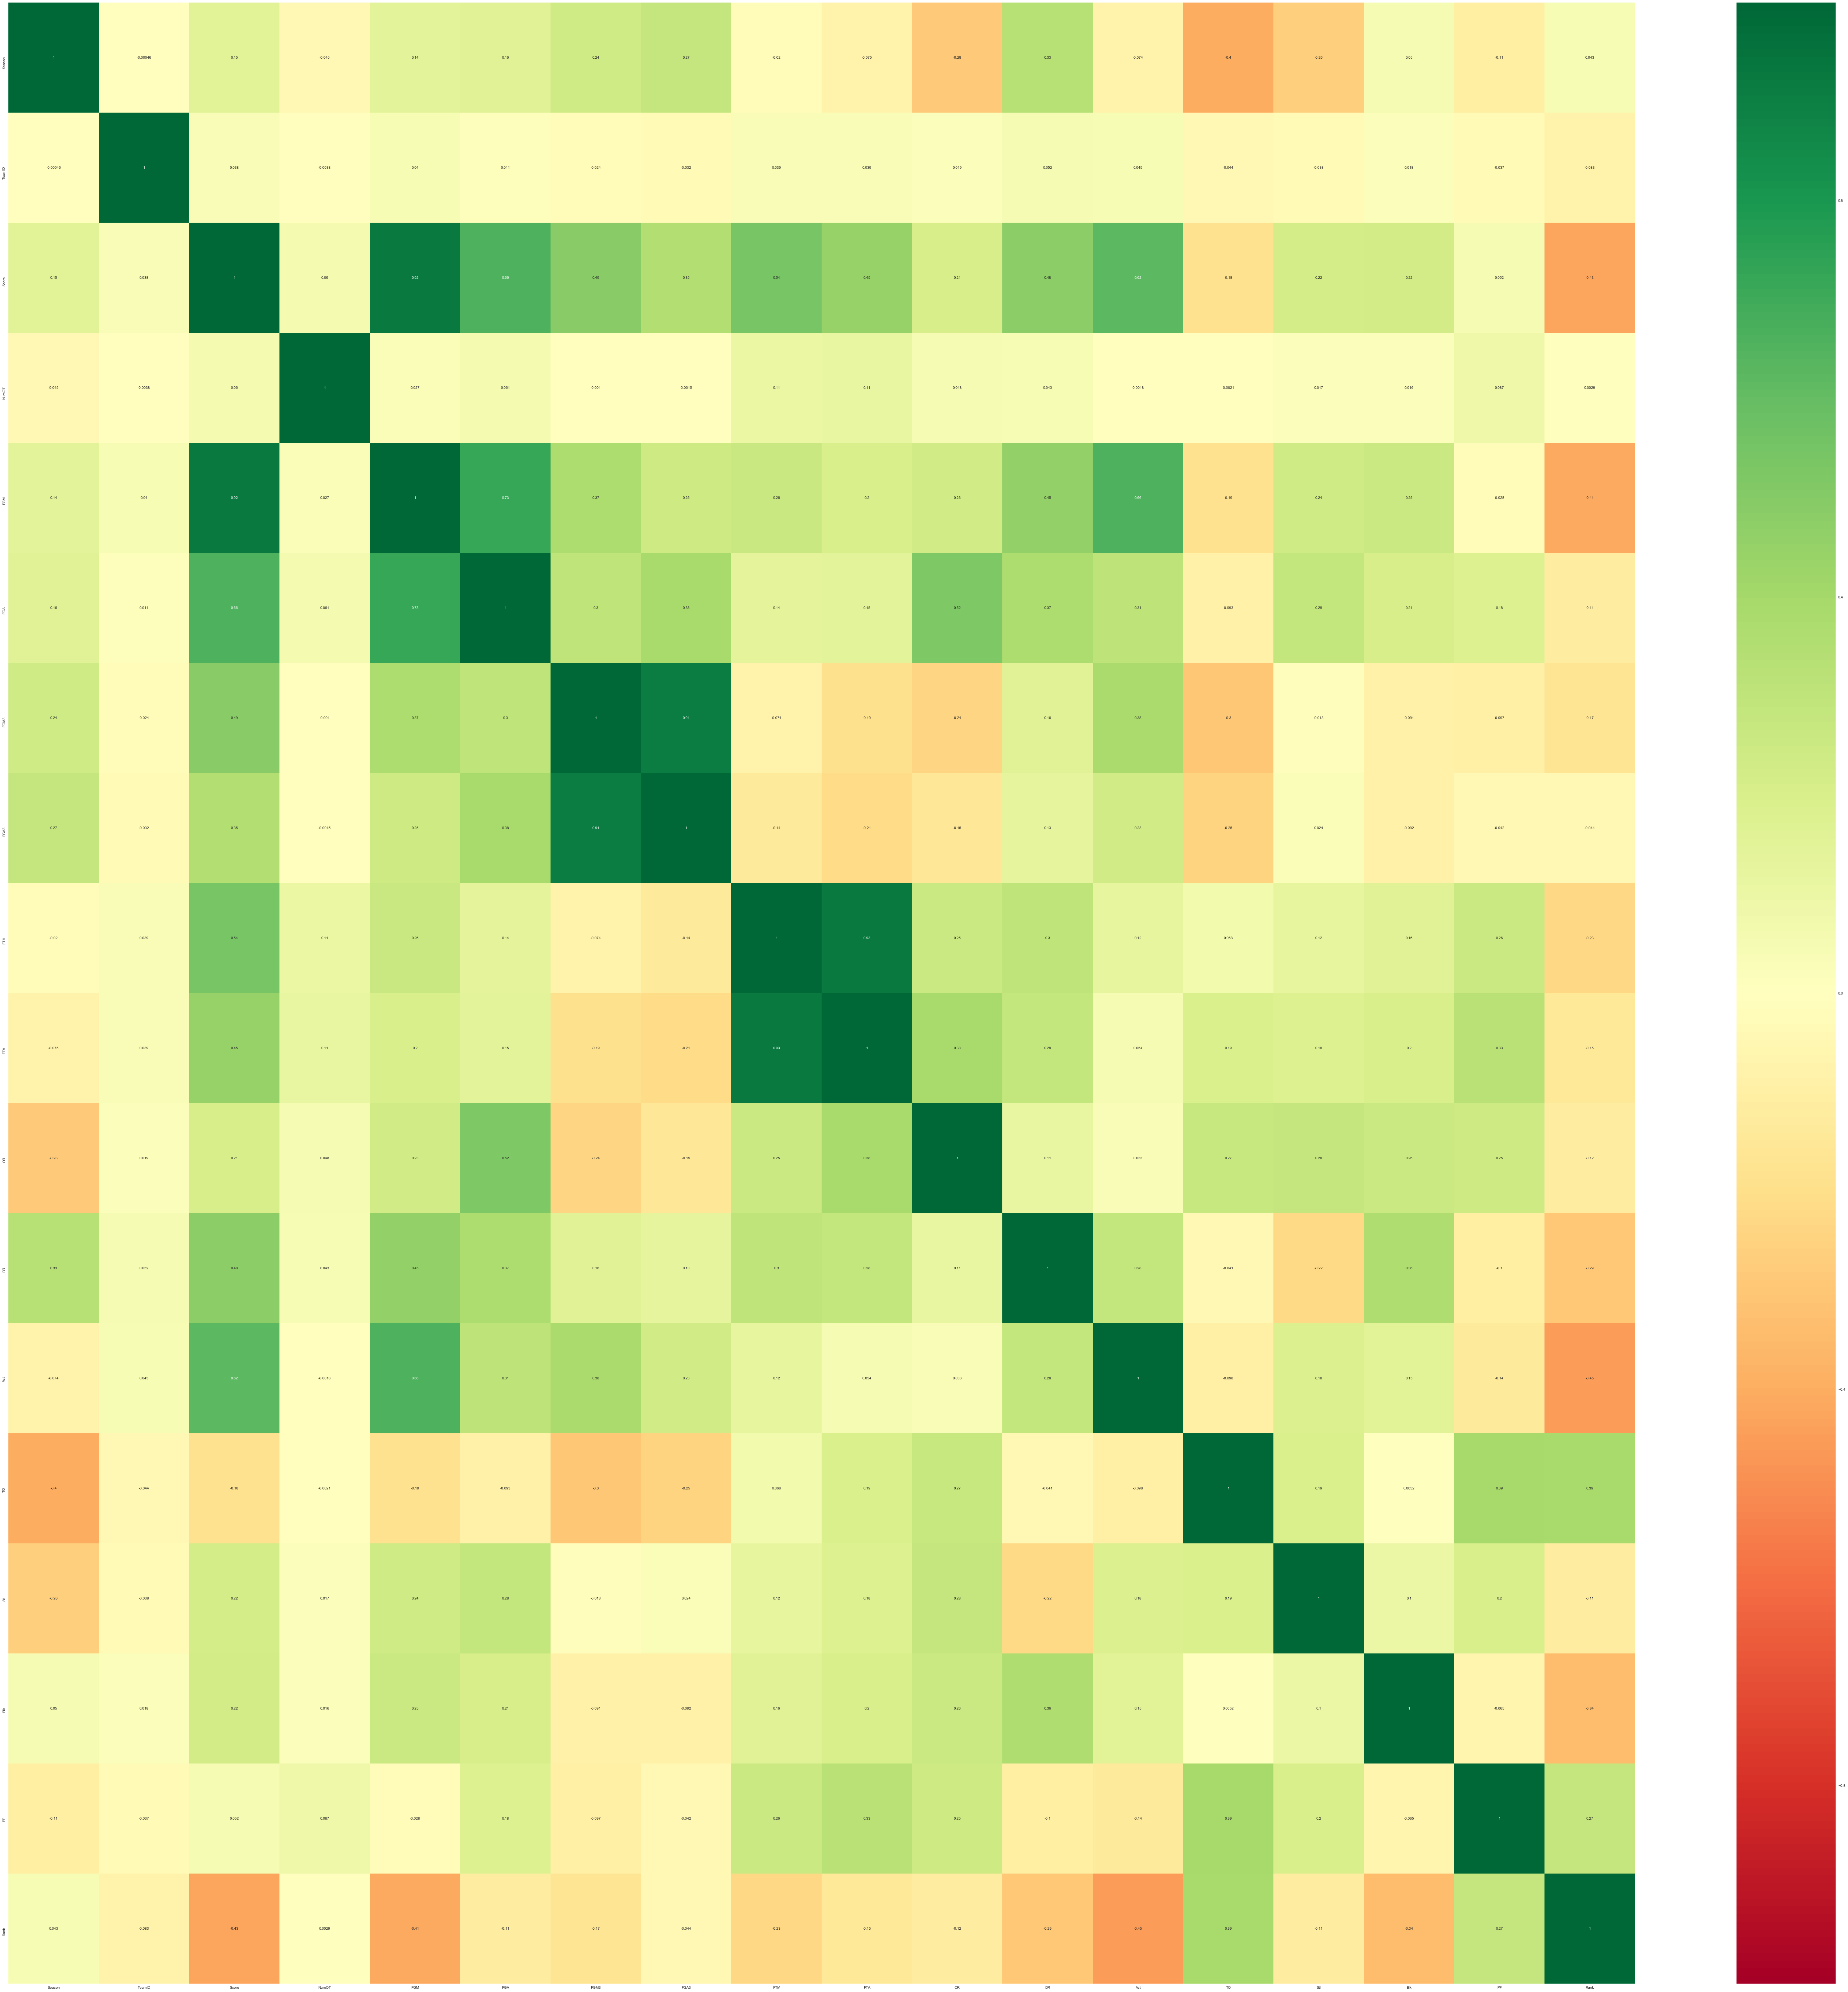

In [22]:
# check correlation matrix
%matplotlib inline

#get correlations of each features in dataset
corrmat = df_union.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(df_union[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [23]:
# drop remaining irrelevant columns
df_final = df_final.drop(columns=['WTeamID', 'LTeamID', 'DayNum'])

In [24]:
df_final.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Season', 'WScore', 'WNumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',
       'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'WRank',
       'LScore', 'LNumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'LRank',
       'Unique_ID', 'Target'],
      dtype='object')>

In [25]:
len(df_final.columns)

35

[ 0.02918882  0.02919264  0.02600374  0.029054    0.030095    0.03058699
  0.03059102  0.02922079  0.03001577  0.03081289  0.03077     0.0301208
  0.03043049  0.03088453  0.03082524  0.0314428   0.03114302  0.02935786
  0.02637672  0.03112862  0.03081081  0.03035817  0.03099552  0.03045728
  0.02993156  0.03104317  0.03115292  0.03066615  0.03099748  0.03093403
  0.0309509   0.03096115  0.03349912]


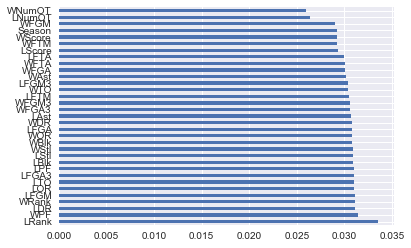

In [26]:
X = df_final.iloc[:,0:33] # exclude labels
y = df_final.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(33).plot(kind='barh')
plt.show()

### Run Logistic

In [45]:
features = feat_importances.nlargest(33).index
features

Index(['LRank', 'LDR', 'LFGA', 'LTO', 'LPF', 'WFGA', 'WRank', 'LOR', 'LFGM3',
       'WOR', 'LBlk', 'LFGA3', 'LAst', 'WPF', 'LFTM', 'WStl', 'WTO', 'LFTA',
       'LStl', 'WFGM3', 'WFGA3', 'LFGM', 'WDR', 'WBlk', 'WAst', 'WFGM',
       'WScore', 'WFTA', 'WFTM', 'LScore'],
      dtype='object')

In [46]:
X_log = df_final.loc[:,features]
y_log = df_final.iloc[:,-1]

In [47]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

log_model = LogisticRegressionCV(cv=10, scoring='neg_log_loss', max_iter=1000, random_state=0).fit(X_log, y_log)
print("Average Log Loss with 10 folds: %.4g" % log_model.score(X_log,y_log)) 

Average Log Loss with 10 folds: 0.5335


In [48]:
from sklearn.metrics import log_loss

y_log_pred = log_model.predict_proba(X_log)
score = log_loss(y_log, y_log_pred)
score

0.69028308922783554

### Run GBM

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

X_gbm = df_final.iloc[:,0:33] # exclude labels
y_gbm = df_final.iloc[:,-1]

param_test1 = {'n_estimators':np.arange(180,301,20)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=200,min_samples_leaf=10,max_depth=6,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='log_loss',n_jobs=2,iid=False, cv=5)
gsearch1.fit(X_gbm, y_gbm)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.68990, std: 0.01249, params: {'n_estimators': 180},
  mean: -0.68942, std: 0.01448, params: {'n_estimators': 200},
  mean: -0.68930, std: 0.01535, params: {'n_estimators': 220},
  mean: -0.68847, std: 0.01652, params: {'n_estimators': 240},
  mean: -0.68744, std: 0.01811, params: {'n_estimators': 260},
  mean: -0.68775, std: 0.01929, params: {'n_estimators': 280},
  mean: -0.68821, std: 0.02045, params: {'n_estimators': 300}],
 {'n_estimators': 260},
 -0.6874442091026897)

In [32]:
# n_estimators=260
param_test2 = {'max_depth':np.arange(10,20,2), 'min_samples_split':np.arange(100,500,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=260, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='log_loss',n_jobs=2,iid=False, cv=5)
gsearch2.fit(X_gbm, y_gbm)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -0.68128, std: 0.03887, params: {'max_depth': 10, 'min_samples_split': 100},
  mean: -0.68101, std: 0.03768, params: {'max_depth': 10, 'min_samples_split': 200},
  mean: -0.68020, std: 0.03205, params: {'max_depth': 10, 'min_samples_split': 300},
  mean: -0.68063, std: 0.03195, params: {'max_depth': 10, 'min_samples_split': 400},
  mean: -0.68821, std: 0.03991, params: {'max_depth': 12, 'min_samples_split': 100},
  mean: -0.68385, std: 0.04255, params: {'max_depth': 12, 'min_samples_split': 200},
  mean: -0.67985, std: 0.03548, params: {'max_depth': 12, 'min_samples_split': 300},
  mean: -0.68420, std: 0.03465, params: {'max_depth': 12, 'min_samples_split': 400},
  mean: -0.69961, std: 0.04446, params: {'max_depth': 14, 'min_samples_split': 100},
  mean: -0.68439, std: 0.03955, params: {'max_depth': 14, 'min_samples_split': 200},
  mean: -0.68392, std: 0.04031, params: {'max_depth': 14, 'min_samples_split': 300},
  mean: -0.68214, std: 0.03767, params: {'max_depth': 14, 'min_sa

In [33]:
# 'max_depth': 12
param_test3 = {'min_samples_split':np.arange(100,401,100), 'min_samples_leaf':np.arange(15,36,5)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=260, max_depth=12, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='log_loss',n_jobs=2,iid=False, cv=5)
gsearch3.fit(X_gbm, y_gbm)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -0.68776, std: 0.04447, params: {'min_samples_leaf': 15, 'min_samples_split': 100},
  mean: -0.68152, std: 0.03813, params: {'min_samples_leaf': 15, 'min_samples_split': 200},
  mean: -0.68097, std: 0.03584, params: {'min_samples_leaf': 15, 'min_samples_split': 300},
  mean: -0.68363, std: 0.03508, params: {'min_samples_leaf': 15, 'min_samples_split': 400},
  mean: -0.68783, std: 0.03884, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: -0.68187, std: 0.03529, params: {'min_samples_leaf': 20, 'min_samples_split': 200},
  mean: -0.68359, std: 0.03789, params: {'min_samples_leaf': 20, 'min_samples_split': 300},
  mean: -0.68236, std: 0.03446, params: {'min_samples_leaf': 20, 'min_samples_split': 400},
  mean: -0.68415, std: 0.04113, params: {'min_samples_leaf': 25, 'min_samples_split': 100},
  mean: -0.68584, std: 0.03809, params: {'min_samples_leaf': 25, 'min_samples_split': 200},
  mean: -0.68238, std: 0.03754, params: {'min_samples_leaf': 25, 'min_samples_sp

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

X_gbm = df_final.iloc[:,0:33] # exclude labels
y_gbm = df_final.iloc[:,-1]

param_test4 = {'max_features':np.arange(24,33,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=260, max_depth=12, min_samples_split=300, min_samples_leaf=30, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='neg_log_loss',n_jobs=2,iid=False, cv=5)
gsearch4.fit(X_gbm, y_gbm)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

C:\Users\manth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\manth\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: -0.68462, std: 0.01874, params: {'max_features': 24},
  mean: -0.68185, std: 0.02008, params: {'max_features': 26},
  mean: -0.68114, std: 0.01802, params: {'max_features': 28},
  mean: -0.68077, std: 0.02262, params: {'max_features': 30},
  mean: -0.67899, std: 0.02041, params: {'max_features': 32}],
 {'max_features': 32},
 -0.6789931380134583)

In [28]:
from sklearn.metrics import log_loss

y_gbm_pred = gsearch4.predict_proba(X_gbm)
score = log_loss(y_gbm, y_gbm_pred)
score

0.24639690430368033

### Run MLP

In [46]:
features_mlp = feat_importances.nlargest(33).index
X_mlp = df_final.loc[:,features_mlp]
y_mlp = df_final.iloc[:,-1]

In [47]:
# scale-standardize in order to converge before the maximum number of iterations
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_mlp)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_mlp = scaler.transform(X_mlp)
X_mlp

array([[ 0.24668614,  0.74068361, -0.07632253, ..., -1.69443145,
         3.41808069,  0.06300349],
       [ 0.24668614, -0.30288448, -0.11626082, ..., -1.69443145,
        -0.72780267,  0.06300349],
       [ 0.24668614, -1.23189547, -1.59187561, ..., -1.69443145,
        -0.72780267,  0.06300349],
       ..., 
       [-0.75567466, -0.06435463,  1.4263557 , ...,  1.59166916,
        -0.72780267,  0.22373537],
       [-0.75567466, -0.20747254,  0.98603603, ...,  1.59166916,
        -0.72780267,  0.22373537],
       [-0.75567466,  0.10602383,  0.7224433 , ...,  1.59166916,
        -0.72780267,  0.22373537]])

In [48]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(32,64),max_iter=5000)
mlp.fit(X_mlp,y_mlp)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(32, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [49]:
from sklearn.metrics import log_loss

y_mlp_pred = mlp.predict_proba(X_mlp)
score = log_loss(y_mlp, y_mlp_pred)
score

0.59138637812532446

In [51]:
# tune
mlp_tuned = MLPClassifier(max_iter=100)

In [55]:
parameter_space = {
    'hidden_layer_sizes': [(32, 64, 96), (32,32,32) ],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
    'max_iter':[7000, 5000]
}

In [56]:
from sklearn.grid_search import GridSearchCV

clf = GridSearchCV(mlp_tuned, parameter_space, n_jobs=2, cv=5)
clf.fit(X_mlp, y_mlp)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'hidden_layer_sizes': [(32, 64, 96), (32, 32, 32)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'max_iter': [7000, 5000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [58]:
clf.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (32, 64, 96),
 'max_iter': 5000,
 'solver': 'sgd'}

In [59]:
y_mlp_pred = clf.predict_proba(X_mlp)
score = log_loss(y_mlp, y_mlp_pred)
score

0.53621858251292176

By applying the trial and error methodology, we found out that the best model thus far is the GBM model WITHOUT the seeds info.

### Load Submission file and make predictions

In [29]:
df_submission = pd.read_csv('./SampleSubmissionStage2.csv')
df_submission.head(20)

,ID,Pred
0,2019_1101_1113,0.5
1,2019_1101_1120,0.5
2,2019_1101_1124,0.5
3,2019_1101_1125,0.5
4,2019_1101_1133,0.5
5,2019_1101_1138,0.5
6,2019_1101_1153,0.5
7,2019_1101_1159,0.5
8,2019_1101_1181,0.5
9,2019_1101_1192,0.5


In [30]:
print('Submitted file should contain', len(df_submission), 'rows')

Submitted file should contain 2278 rows


In [31]:
# split id
df_tmp = df_submission['ID'].str.split("_", n = 2, expand = True)
df_submission['Season'] = df_tmp[0]
df_submission['WTeamID'] = df_tmp[1]  
df_submission['LTeamID'] = df_tmp[2]
# df_submission = df_submission.drop(df_submission.columns[1], axis=1)
df_submission

,ID,Pred,Season,WTeamID,LTeamID
0,2019_1101_1113,0.5,2019,1101,1113
1,2019_1101_1120,0.5,2019,1101,1120
2,2019_1101_1124,0.5,2019,1101,1124
3,2019_1101_1125,0.5,2019,1101,1125
4,2019_1101_1133,0.5,2019,1101,1133
5,2019_1101_1138,0.5,2019,1101,1138
6,2019_1101_1153,0.5,2019,1101,1153
7,2019_1101_1159,0.5,2019,1101,1159
8,2019_1101_1181,0.5,2019,1101,1181
9,2019_1101_1192,0.5,2019,1101,1192


In [32]:
# convert to int64
df_submission[['Season', 'WTeamID', 'LTeamID']] = df_submission[['Season', 'WTeamID', 'LTeamID']].astype('int64')

In [33]:
# filter data from df that match the ids of the submission file

# filter for winning team
df_predictions = pd.merge(df_submission, dfW_agg, 'left', on=['Season', 'WTeamID'])#.drop(columns=['Unique_ID'])
# filter for losing team
df_predictions = pd.merge(df_predictions, dfL_agg, 'left', on=['Season', 'LTeamID'])#.drop(columns=['Unique_ID'])
df_predictions['Pred'] =  0
df_predictions

,ID,Pred,Season,WTeamID,LTeamID,WScore,WNumOT,WFGM,WFGA,WFGM3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LRank
0,2019_1101_1113,0,2019,1101,1113,72.833333,0.000000,25.500000,56.291667,7.416667,...,16.000000,24.545455,13.000000,25.454545,10.636364,13.090909,6.181818,3.181818,19.545455,44.545455
1,2019_1101_1120,0,2019,1101,1120,72.833333,0.000000,25.500000,56.291667,7.416667,...,12.454545,17.909091,11.363636,21.727273,11.000000,16.363636,7.090909,3.818182,20.181818,15.545455
2,2019_1101_1124,0,2019,1101,1124,72.833333,0.000000,25.500000,56.291667,7.416667,...,12.333333,19.166667,13.166667,24.333333,12.666667,14.083333,6.250000,3.000000,21.250000,52.166667
3,2019_1101_1125,0,2019,1101,1125,72.833333,0.000000,25.500000,56.291667,7.416667,...,10.250000,12.750000,8.250000,26.500000,14.250000,10.000000,6.250000,3.250000,17.750000,54.250000
4,2019_1101_1133,0,2019,1101,1133,72.833333,0.000000,25.500000,56.291667,7.416667,...,10.384615,15.538462,9.538462,22.692308,10.692308,14.000000,6.230769,3.384615,17.846154,192.153846
5,2019_1101_1138,0,2019,1101,1138,72.833333,0.000000,25.500000,56.291667,7.416667,...,17.000000,25.000000,11.000000,26.666667,11.666667,14.333333,6.000000,3.333333,22.333333,17.333333
6,2019_1101_1153,0,2019,1101,1153,72.833333,0.000000,25.500000,56.291667,7.416667,...,12.000000,18.400000,13.600000,18.400000,9.600000,10.800000,5.600000,4.000000,18.000000,26.400000
7,2019_1101_1159,0,2019,1101,1159,72.833333,0.000000,25.500000,56.291667,7.416667,...,8.000000,11.111111,12.777778,23.111111,14.333333,15.777778,5.777778,3.222222,18.111111,162.888889
8,2019_1101_1181,0,2019,1101,1181,72.833333,0.000000,25.500000,56.291667,7.416667,...,15.000000,20.200000,12.600000,28.800000,13.000000,15.200000,7.200000,7.800000,17.200000,1.000000
9,2019_1101_1192,0,2019,1101,1192,72.833333,0.000000,25.500000,56.291667,7.416667,...,12.555556,16.888889,8.777778,19.555556,14.666667,13.333333,7.333333,3.666667,19.222222,233.666667


In [34]:
# check features of predictions df
X_cols = df_predictions.columns.to_list()
X_cols

['ID',
 'Pred',
 'Season',
 'WTeamID',
 'LTeamID',
 'WScore',
 'WNumOT',
 'WFGM',
 'WFGA',
 'WFGM3',
 'WFGA3',
 'WFTM',
 'WFTA',
 'WOR',
 'WDR',
 'WAst',
 'WTO',
 'WStl',
 'WBlk',
 'WPF',
 'WRank',
 'LScore',
 'LNumOT',
 'LFGM',
 'LFGA',
 'LFGM3',
 'LFGA3',
 'LFTM',
 'LFTA',
 'LOR',
 'LDR',
 'LAst',
 'LTO',
 'LStl',
 'LBlk',
 'LPF',
 'LRank']

In [35]:
X_cols = X_cols[2:3] + X_cols[5:]
len(df_predictions[X_cols].columns)
# len(df_predictions.iloc[:,2].columns + df_predictions.iloc[:,5:].columns)

33

In [36]:
X = df_predictions[X_cols]
y = df_predictions.iloc[:,1]

In [37]:
# predict
y_pred = gsearch4.predict_proba(X)
df_predictions['Pred'] = y_pred[:,1]
df_predictions = df_predictions.set_index('ID')
df_predictions

,Pred,Season,WTeamID,LTeamID,WScore,WNumOT,WFGM,WFGA,WFGM3,WFGA3,...,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LRank
ID,,,,,,,,,,,,,,,,,,,,,
2019_1101_1113,0.440803,2019,1101,1113,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,16.000000,24.545455,13.000000,25.454545,10.636364,13.090909,6.181818,3.181818,19.545455,44.545455
2019_1101_1120,0.633630,2019,1101,1120,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,12.454545,17.909091,11.363636,21.727273,11.000000,16.363636,7.090909,3.818182,20.181818,15.545455
2019_1101_1124,0.562385,2019,1101,1124,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,12.333333,19.166667,13.166667,24.333333,12.666667,14.083333,6.250000,3.000000,21.250000,52.166667
2019_1101_1125,0.565890,2019,1101,1125,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,10.250000,12.750000,8.250000,26.500000,14.250000,10.000000,6.250000,3.250000,17.750000,54.250000
2019_1101_1133,0.546036,2019,1101,1133,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,10.384615,15.538462,9.538462,22.692308,10.692308,14.000000,6.230769,3.384615,17.846154,192.153846
2019_1101_1138,0.674250,2019,1101,1138,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,17.000000,25.000000,11.000000,26.666667,11.666667,14.333333,6.000000,3.333333,22.333333,17.333333
2019_1101_1153,0.592105,2019,1101,1153,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,12.000000,18.400000,13.600000,18.400000,9.600000,10.800000,5.600000,4.000000,18.000000,26.400000
2019_1101_1159,0.814031,2019,1101,1159,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,8.000000,11.111111,12.777778,23.111111,14.333333,15.777778,5.777778,3.222222,18.111111,162.888889
2019_1101_1181,0.333656,2019,1101,1181,72.833333,0.000000,25.500000,56.291667,7.416667,20.125000,...,15.000000,20.200000,12.600000,28.800000,13.000000,15.200000,7.200000,7.800000,17.200000,1.000000


In [38]:
# write file
df_predictions.loc[:,['Pred']].to_csv('predictions_stage2.csv')